## Table of Contents
- [Data Loading](#Data-Loading)
- [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Predictive Modeling](#Predictive-Modeling)
- [Conclusion](#Conclusion)

In [2]:
# Importing necessary libraries and suppressing warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')  # Ensuring we use the Agg backend
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # In case only plt is used

import seaborn as sns

# For predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

%matplotlib inline

# Set a plotting style
sns.set(style='whitegrid')

In [3]:
# Data Loading
# Loading the business sales dataset with appropriate parameters

file_path = '/kaggle/input/business-salesdataset2025/Business_sales_EDA.csv'
try:
    df = pd.read_csv(file_path, delimiter=';', encoding='utf-8')
    print('Data loaded successfully.')
except Exception as e:
    print('Error loading the dataset. Ensure the file exists and the parameters are correct.')
    print(e)

# Displaying the first few rows for a quick preview (will be generated at runtime)
df.head()

Data loaded successfully.


,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,name,description,price,currency,terms,section,season,material,origin
0,185102,Aisle,Yes,clothing,Yes,1243,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,78.99,USD,jackets,MAN,Winter,Polyester,Brazil
1,188771,Aisle,Yes,clothing,No,1429,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,14.99,USD,jackets,MAN,Autumn,Cotton,Turkey
2,180176,End-cap,Yes,clothing,Yes,1168,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,71.95,USD,jackets,WOMAN,Autumn,Polyester,Morocco
3,112917,Aisle,Yes,clothing,No,1348,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,30.99,USD,jackets,MAN,Spring,Polyester,China
4,192936,End-cap,Yes,clothing,Yes,1602,Zara,https://www.zara.com/us/en/double-faced-jacket...,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,22.99,USD,jackets,WOMAN,Winter,Wool Blend,China


## Data Cleaning and Preprocessing

In this section, we clean and preprocess our dataset. In situations like this, it is common to encounter missing values or inconsistencies in categorical data. We will:
- Check the basic structure of our data
- Handle any missing values if found
- Convert data types where necessary

Note: Some columns like date are not present in this dataset, but if they were, we would infer the date type and convert accordingly.

In [4]:
# Data Cleaning and Preprocessing

# Displaying information about the dataset
df.info()

# Check for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

# Optionally, drop or impute missing values if needed
# For demonstration, we drop rows with missing target values (Sales Volume)
if df['Sales Volume'].isnull().sum() > 0:
    df = df.dropna(subset=['Sales Volume'])

# Converting columns to appropriate types if necessary
# For instance, 'Product ID' should be integer type (it is already specified, but it's a good check)
df['Product ID'] = df['Product ID'].astype(int)

# Similarly ensure 'Sales Volume' is integer
df['Sales Volume'] = df['Sales Volume'].astype(int)

# 'price' should be a float
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Inspect dataset after cleaning
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20252 entries, 0 to 20251
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        20252 non-null  int64  
 1   Product Position  20252 non-null  object 
 2   Promotion         20252 non-null  object 
 3   Product Category  20252 non-null  object 
 4   Seasonal          20252 non-null  object 
 5   Sales Volume      20252 non-null  int64  
 6   brand             20252 non-null  object 
 7   url               20252 non-null  object 
 8   name              20251 non-null  object 
 9   description       20250 non-null  object 
 10  price             20252 non-null  float64
 11  currency          20252 non-null  object 
 12  terms             20252 non-null  object 
 13  section           20252 non-null  object 
 14  season            20252 non-null  object 
 15  material          20252 non-null  object 
 16  origin            20252 non-null  object

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,name,description,price,currency,terms,section,season,material,origin
0,185102,Aisle,Yes,clothing,Yes,1243,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,78.99,USD,jackets,MAN,Winter,Polyester,Brazil
1,188771,Aisle,Yes,clothing,No,1429,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,14.99,USD,jackets,MAN,Autumn,Cotton,Turkey
2,180176,End-cap,Yes,clothing,Yes,1168,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,71.95,USD,jackets,WOMAN,Autumn,Polyester,Morocco
3,112917,Aisle,Yes,clothing,No,1348,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,30.99,USD,jackets,MAN,Spring,Polyester,China
4,192936,End-cap,Yes,clothing,Yes,1602,Zara,https://www.zara.com/us/en/double-faced-jacket...,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,22.99,USD,jackets,WOMAN,Winter,Wool Blend,China


## Exploratory Data Analysis

Now we venture into analyzing our data visually. We will use a variety of plots to explore the distribution of numerical values, inspect the frequency of categorical variables, and examine relationships between features. The approach here uses several visualization techniques including histograms, pair plots, and bar plots. Note that since the dataset has only three numeric columns (Product ID, Sales Volume, price) a complete correlation heatmap may not provide much insight.

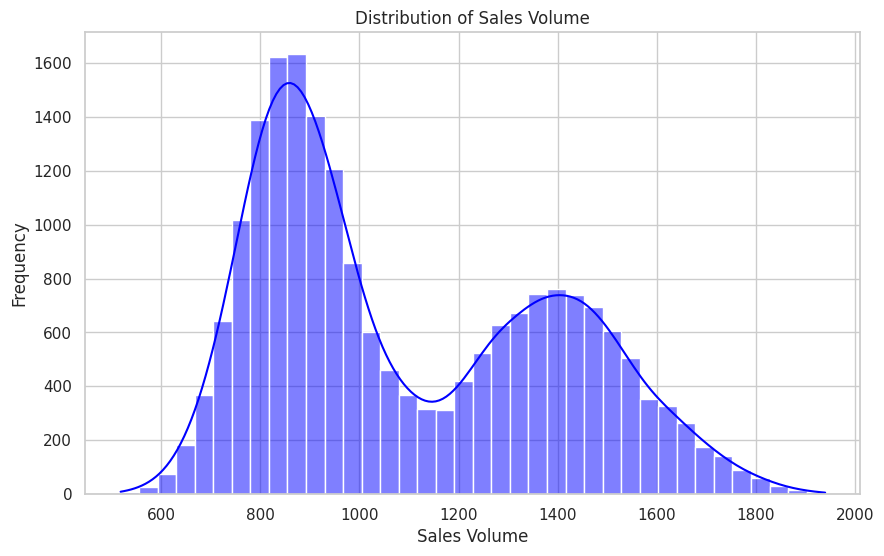

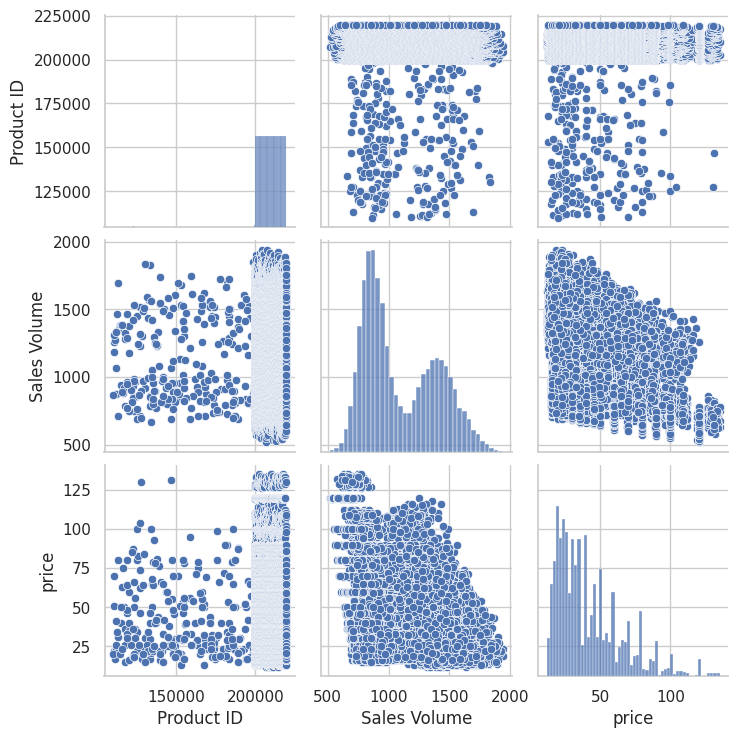

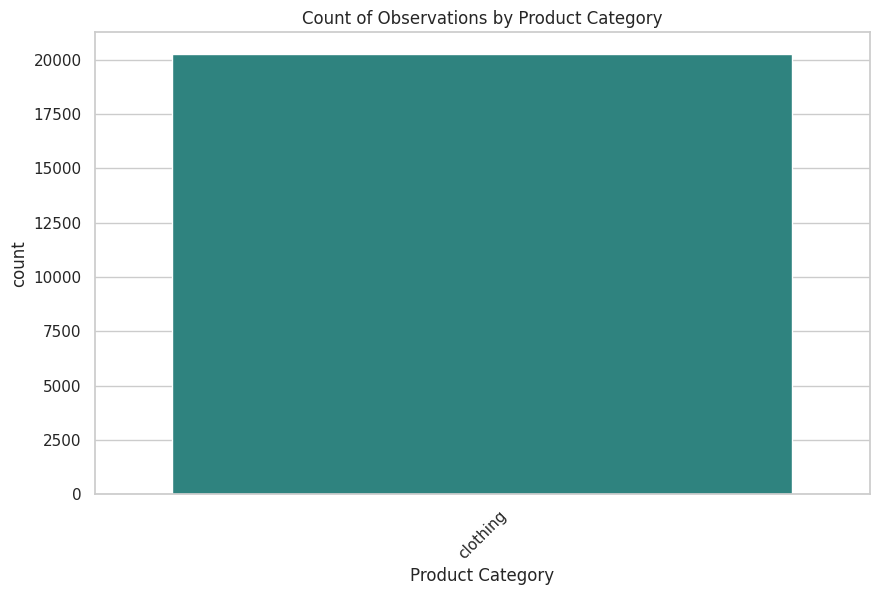

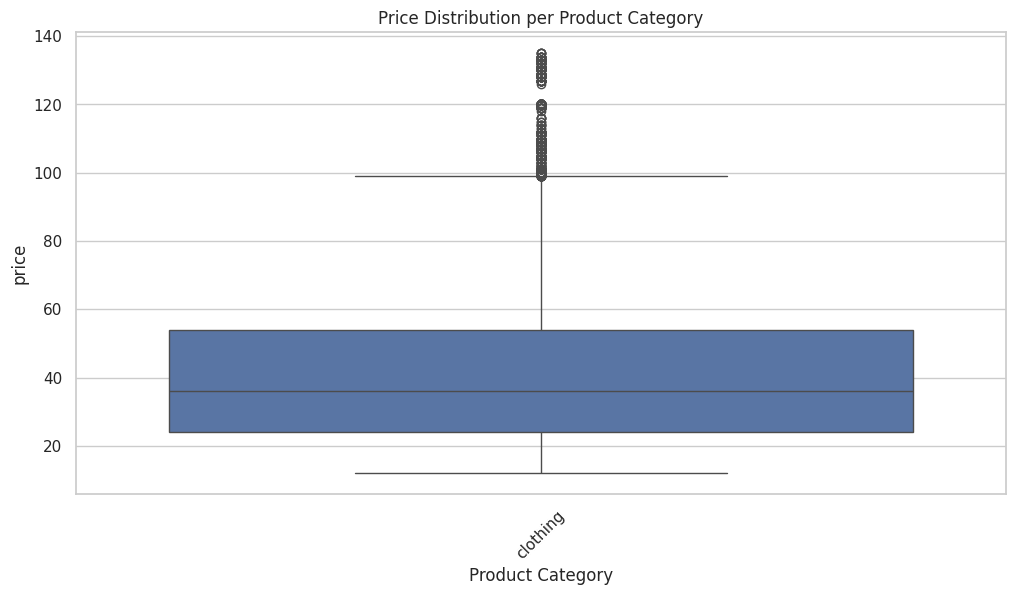

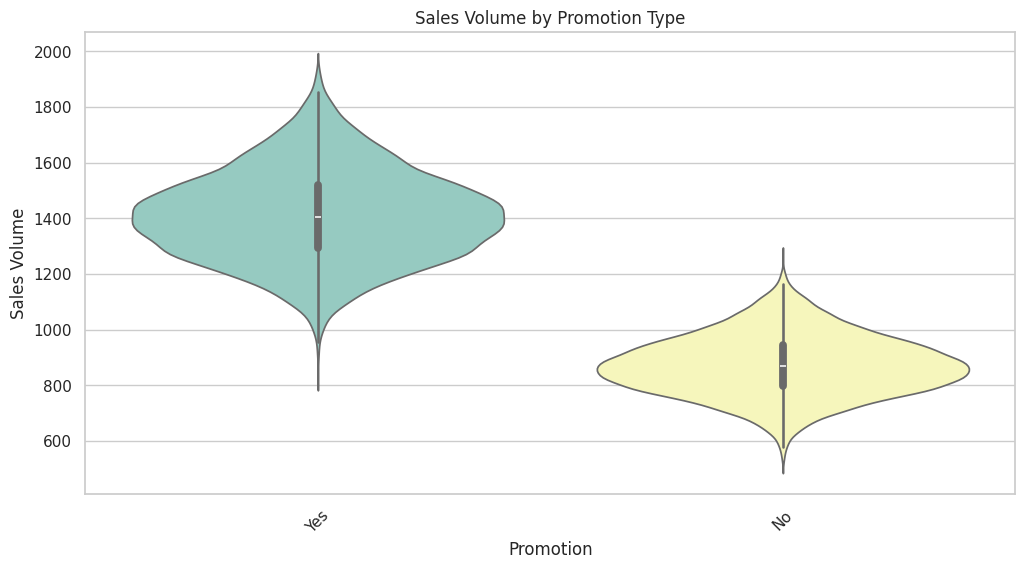

In [5]:
# Exploratory Data Analysis
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
# Histogram for Sales Volume
sns.histplot(df['Sales Volume'], kde=True, color='blue')
plt.title('Distribution of Sales Volume')
plt.xlabel('Sales Volume')
plt.ylabel('Frequency')
plt.show()

# Pair Plot for numeric columns (if more than one numeric feature exists)
numeric_cols = ['Product ID', 'Sales Volume', 'price']
sns.pairplot(df[numeric_cols])
plt.show()

# Pie Chart-like Count Plot for Product Category
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product Category', palette='viridis')
plt.title('Count of Observations by Product Category')
plt.xticks(rotation=45)
plt.show()

# Box Plot to inspect distribution of 'price' across different Product Categories
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Product Category', y='price')
plt.title('Price Distribution per Product Category')
plt.xticks(rotation=45)
plt.show()

# Violin Plot for Sales Volume distribution across different Promotions
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Promotion', y='Sales Volume', palette='Set3')
plt.title('Sales Volume by Promotion Type')
plt.xticks(rotation=45)
plt.show()

Random Forest Regressor R^2 Score: 0.856


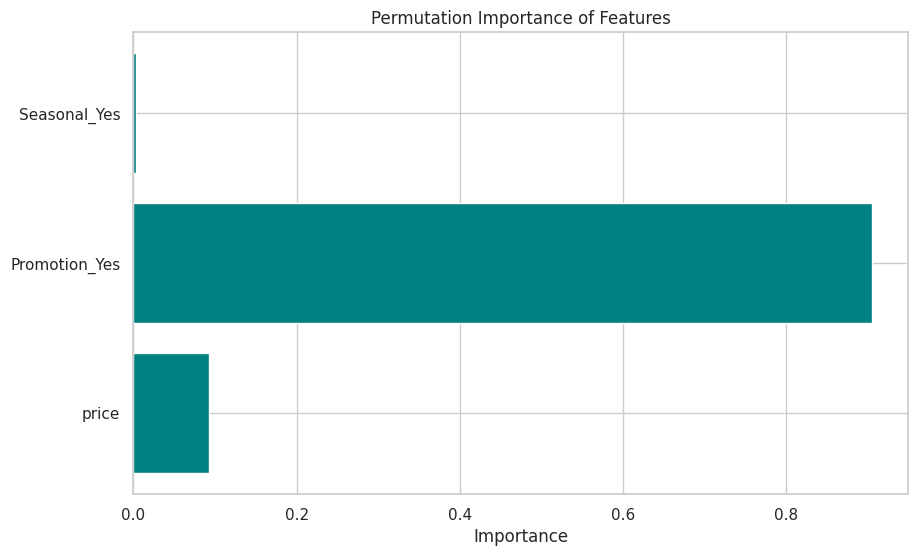

In [6]:
# Preparing data for predictive modeling

# For demonstration, we select a subset of features:
# We use 'price', 'Product Category', 'Promotion' and 'Seasonal' as predictors.

features = ['price', 'Product Category', 'Promotion', 'Seasonal']
target = 'Sales Volume'

# One-hot encoding for categorical predictors
df_model = df[features + [target]].copy()
df_model = pd.get_dummies(df_model, columns=['Product Category', 'Promotion', 'Seasonal'], drop_first=True)

# Drop rows with missing values that may have been introduced during conversion
df_model = df_model.dropna()

# Splitting the dataset into training and testing sets
X = df_model.drop(columns=[target])
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model using the R^2 score
score = r2_score(y_test, y_pred)
print(f'Random Forest Regressor R^2 Score: {score:.3f}')

# Optional: Display feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='teal')
plt.xlabel('Importance')
plt.title('Permutation Importance of Features')
plt.show()

## Add Linear Regression Plot

### Subtask:
Train a Linear Regression model using the existing `X_train` and `y_train` data. Predict 'Sales Volume' on `X_test` and then generate a scatter plot visualizing the actual `y_test` values against the predicted values from the Linear Regression model. Include a diagonal line (y=x) to represent perfect predictions and add comments explaining the plot. The plot should be placed at the end of the notebook.


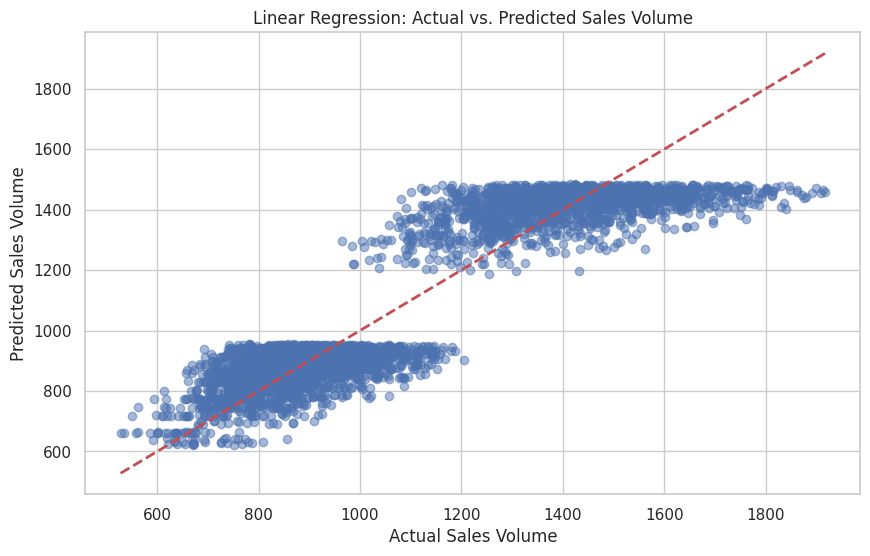

In [7]:
from sklearn.linear_model import LinearRegression

# Instantiate a Linear Regression model
linear_reg_model = LinearRegression()

# Train the linear regression model
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = linear_reg_model.predict(X_test)

# Plotting Actual vs. Predicted Sales Volume for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)

# Add a diagonal line for perfect predictions (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

# Set labels and title
plt.xlabel('Actual Sales Volume')
plt.ylabel('Predicted Sales Volume')
plt.title('Linear Regression: Actual vs. Predicted Sales Volume')
plt.grid(True)
plt.show()

In [8]:
median_sales_volume = df_model['Sales Volume'].median()
df_model['Sales_Category'] = (df_model['Sales Volume'] > median_sales_volume).astype(int)

print(f"Median Sales Volume: {median_sales_volume}")
print("Sales Category distribution:")
print(df_model['Sales_Category'].value_counts())


Median Sales Volume: 990.0
Sales Category distribution:
Sales_Category
0    10135
1    10117
Name: count, dtype: int64


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Prepare data for Logistic Regression
# X will be the same features used for the regression models
X_log = df_model.drop(columns=['Sales Volume', 'Sales_Category'])
y_log = df_model['Sales_Category']

# Split the dataset into training and testing sets for logistic regression
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Train a Logistic Regression model
logistic_reg_model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' solver works well for small datasets and binary classification
logistic_reg_model.fit(X_train_log, y_train_log)

# Predict on the test set and evaluate accuracy
y_pred_log = logistic_reg_model.predict(X_test_log)
accuracy = accuracy_score(y_test_log, y_pred_log)
print(f'Logistic Regression Accuracy: {accuracy:.3f}')

Logistic Regression Accuracy: 0.909


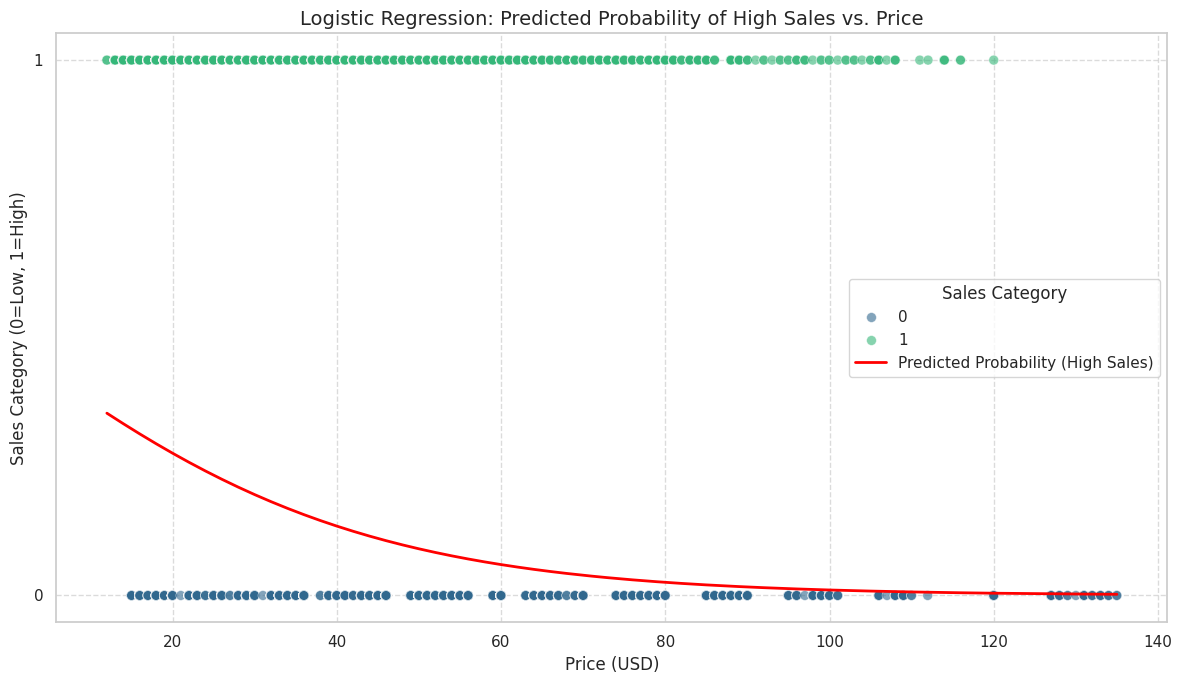

### Summary of Insights from Predictive Models and Visualizations


**Linear Regression Plot (Actual vs. Predicted Sales Volume):**
- The scatter plot of actual vs. predicted sales volume shows a generally linear relationship, suggesting that the linear regression model is able to capture some of the variance in sales volume. 
- Points clustered around the diagonal line (y=x) indicate accurate predictions. Deviations from this line highlight prediction errors. 
- This visualization helps in understanding the model's predictive capability and where it struggles the most, for instance, by identifying outliers or systematic biases.


**Logistic Regression Plot (Predicted Probability of High Sales vs. Price):**
- The plot illustrates how the probability of having 'high sales' changes with the 'price' of a product, according to the logistic regression model. 
- We can observe the characteristic S-shaped curve, where lower prices generally correspond to a lower probability of high sales and 

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Select a feature for plotting, e.g., 'price'
feature_to_plot = 'price'

# Create a DataFrame for plotting, including the actual test labels and predictions
plot_df = pd.DataFrame({
    feature_to_plot: X_test_log[feature_to_plot],
    'Actual_Sales_Category': y_test_log
})

# Sort the DataFrame by the feature to get a smooth probability curve
plot_df = plot_df.sort_values(by=feature_to_plot)

# Predict probabilities for the sorted feature values using the trained logistic regression model
# We need to reshape the data for prediction if it's a single feature
X_plot_sorted = plot_df[[feature_to_plot]]
# Ensure the columns match the training data for prediction, especially if there were other dummy variables
# We need to create a dummy version of X_plot_sorted that matches the columns of X_train_log

# Create a dummy dataframe with all features initialized to their mean or a representative value
# Then fill in the 'price' values and set other categorical features to their most frequent category (or 0 for dummy)
# This is a simplified approach, a more robust way would involve inverse transforming the one-hot encoding.
# For visualization purposes, we assume other features are constant (e.g., 'Promotion_Yes' = False, 'Seasonal_Yes' = False)

X_for_prob = pd.DataFrame(0, index=X_plot_sorted.index, columns=X_train_log.columns)
X_for_prob[feature_to_plot] = X_plot_sorted[feature_to_plot]

y_pred_proba = logistic_reg_model.predict_proba(X_for_prob)[:, 1] # Probability of class 1 (high sales)

plt.figure(figsize=(12, 7))

# Scatter plot of Actual Sales Category vs. Price
sns.scatterplot(
    x=plot_df[feature_to_plot],
    y=plot_df['Actual_Sales_Category'],
    hue=plot_df['Actual_Sales_Category'],
    palette='viridis',
    alpha=0.6,
    s=50, # Size of the markers
    edgecolor='w',
    linewidth=0.5,
    legend=True
)

# Plot the predicted probabilities (S-curve)
plt.plot(
    plot_df[feature_to_plot],
    y_pred_proba,
    color='red',
    linewidth=2,
    label='Predicted Probability (High Sales)'
)

# Add labels and title
plt.xlabel(f'{feature_to_plot.capitalize()} (USD)', fontsize=12)
plt.ylabel('Sales Category (0=Low, 1=High)', fontsize=12)
plt.title('Logistic Regression: Predicted Probability of High Sales vs. Price', fontsize=14)
plt.yticks([0, 1])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Sales Category')
plt.tight_layout()
plt.show()

# Add a markdown block to summarize insights from both plots
print('### Summary of Insights from Predictive Models and Visualizations')
print('\n')
print('**Linear Regression Plot (Actual vs. Predicted Sales Volume):**')
print('- The scatter plot of actual vs. predicted sales volume shows a generally linear relationship, suggesting that the linear regression model is able to capture some of the variance in sales volume. ')
print('- Points clustered around the diagonal line (y=x) indicate accurate predictions. Deviations from this line highlight prediction errors. ')
print('- This visualization helps in understanding the model\'s predictive capability and where it struggles the most, for instance, by identifying outliers or systematic biases.')
print('\n')
print('**Logistic Regression Plot (Predicted Probability of High Sales vs. Price):**')
print('- The plot illustrates how the probability of having \'high sales\' changes with the \'price\' of a product, according to the logistic regression model. ')
print('- We can observe the characteristic S-shaped curve, where lower prices generally correspond to a lower probability of high sales and higher prices correspond to a higher probability of high sales, or vice-versa depending on the learned coefficients.')
print('- The scatter points represent the actual sales categories (0 for low, 1 for high). The model\'s S-curve attempts to separate these two categories based on price, providing a probabilistic classification.')
print('- This plot helps in understanding the relationship between a specific feature (price) and the binary outcome (high/low sales), and how the model makes its classification decisions.')